# Useful Functions

In [1]:
import collections
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

def normalize_numeric_minmax(df, name):
        df[name] = ((df[name] - df[name].min()) / (df[name].max() - df[name].min())).astype(np.float32)
        
def normalize_numeric_zscore(df, name):
        df[name] = (df[name] - df[name].mean())/df[name].std(ddof=0)
    
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

# Dataset Information

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("Admission_Predict_Ver1.1_small_data_set_for_Linear_Regression.csv")

print('Number of isntances = %d' % (data.shape[0]))

Number of isntances = 500


In [3]:
data[0:5]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# Data Pre-Processing

In [4]:
data = data.drop(['Serial No.'], axis = 1)
data[0:5]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# MinMax Normalize

In [5]:
normalize_numeric_minmax(data, "GRE Score")
normalize_numeric_minmax(data, "TOEFL Score")
normalize_numeric_minmax(data, "University Rating")
normalize_numeric_minmax(data, "SOP")
normalize_numeric_minmax(data, "LOR ")
normalize_numeric_minmax(data, "CGPA")
normalize_numeric_minmax(data, "Research")

data[0:5]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,0.92
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,0.76
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,0.72
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,0.80
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,0.65


In [7]:
x,y=to_xy(data,"Chance of Admit ")

C:\Users\Bruce\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if __name__ == '__main__':


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.4, random_state=75)

In [9]:
X_train.shape

(300, 7)

In [10]:
X_test.shape

(200, 7)

In [11]:
Y_train.shape

(300,)

In [12]:
Y_test.shape

(200,)

# Z-Score Normalize

In [45]:
data2 = pd.read_csv("Admission_Predict_Ver1.1_small_data_set_for_Linear_Regression.csv")
data2 = data2.drop(['Serial No.'], axis = 1)

In [54]:
normalize_numeric_zscore(data2, "GRE Score")
normalize_numeric_zscore(data2, "TOEFL Score")
normalize_numeric_zscore(data2, "University Rating")
normalize_numeric_zscore(data2, "SOP")
normalize_numeric_zscore(data2, "LOR ")
normalize_numeric_zscore(data2, "CGPA")
normalize_numeric_zscore(data2, "Research")
normalize_numeric_zscore(data2, "Chance of Admit ")

data2[0:5]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405,1.406107
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405,0.271349
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405,-0.012340
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405,0.555039
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152,-0.508797


In [55]:
x2,y2=to_xy(data,"Chance of Admit ")

In [56]:
from sklearn.model_selection import train_test_split

X2_train, X2_test, Y2_train, Y2_test = train_test_split(x2,y2, test_size=0.4, random_state=75)

In [57]:
X2_train.shape

(300, 7)

In [58]:
X2_test.shape

(200, 7)

In [59]:
Y2_train.shape

(300,)

In [60]:
Y2_test.shape

(200,)

# SKLearn Modeling

In [67]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

data_regr = linear_model.LinearRegression()
data_regr2 = linear_model.LinearRegression()

data_regr.fit(X_train, Y_train)
data_regr2.fit(X2_train, Y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [68]:
Y_pred = data_regr.predict(X_test)
Y2_pred = data_regr.predict(X2_test)

In [69]:
print("Min/Max Normalization")
for i in range (10):
    print("Chance of Admit : ",Y_test[i], "Prediction : ", Y_pred[i])

Min/Max Normalization
Chance of Admit :  0.82 Prediction :  0.7705034
Chance of Admit :  0.77 Prediction :  0.7601376
Chance of Admit :  0.94 Prediction :  0.93990624
Chance of Admit :  0.42 Prediction :  0.5719953
Chance of Admit :  0.56 Prediction :  0.5098581
Chance of Admit :  0.7 Prediction :  0.6624237
Chance of Admit :  0.59 Prediction :  0.6100758
Chance of Admit :  0.79 Prediction :  0.80826664
Chance of Admit :  0.66 Prediction :  0.6423472
Chance of Admit :  0.64 Prediction :  0.6240851


In [70]:
print("Z-Score Normalization")
for i in range (10):
    print("Chance of Admit : ",Y2_test[i], "Prediction : ", Y2_pred[i])

Z-Score Normalization
Chance of Admit :  0.69688344 Prediction :  0.64946973
Chance of Admit :  0.34227148 Prediction :  0.4976721
Chance of Admit :  1.5479522 Prediction :  1.3636628
Chance of Admit :  -2.1400123 Prediction :  -0.3483244
Chance of Admit :  -1.1470988 Prediction :  -0.6132654
Chance of Admit :  -0.15418528 Prediction :  0.08260536
Chance of Admit :  -0.9343316 Prediction :  -0.13544476
Chance of Admit :  0.48411626 Prediction :  0.76120067
Chance of Admit :  -0.43787485 Prediction :  -0.071086794
Chance of Admit :  -0.5797196 Prediction :  -0.06425917


In [73]:
print("Min/Max Normalization:")
print(data_regr.coef_, data_regr.intercept_)

Min/Max Normalization:
[ 0.11000182  0.09548645  0.03737457 -0.02796788  0.07350437  0.35452768
  0.02564121] 0.34363797


In [74]:
print("Z-Score Normalization:")
print(data_regr2.coef_, data_regr2.intercept_)

Z-Score Normalization:
[ 0.17606413  0.14694974  0.07570177 -0.04909332  0.1204909   0.48692852
  0.09026936] -0.021544535


Min/Max Normalization:
Root mean squared error = 0.0572
R-squared = 0.8214


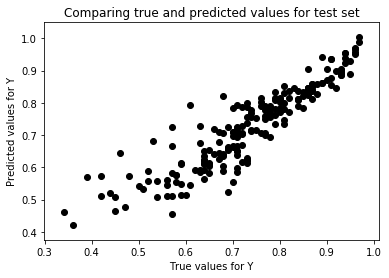

In [75]:
plt.scatter(Y_test, Y_pred, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for Y')
plt.ylabel('Predicted values for Y')

# Model evaluation
print("Min/Max Normalization:")
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, Y_pred)))
print('R-squared = %.4f' % r2_score(Y_test, Y_pred))

Z-Score Normalization:
Root mean squared error = 0.5650
R-squared = 0.6536


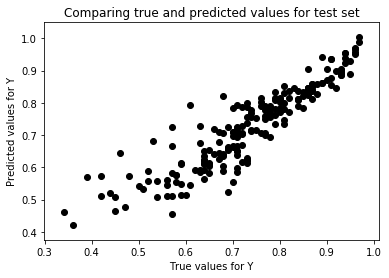

In [77]:
plt.scatter(Y_test, Y_pred, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for Y')
plt.ylabel('Predicted values for Y')

# Model evaluation
print("Z-Score Normalization:")
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y2_test, Y2_pred)))
print('R-squared = %.4f' % r2_score(Y2_test, Y2_pred))

Min/Max Normalization:


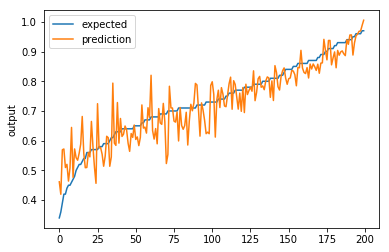

In [80]:
print("Min/Max Normalization:")
chart_regression(Y_pred,Y_test)

Z-Score Normalization:


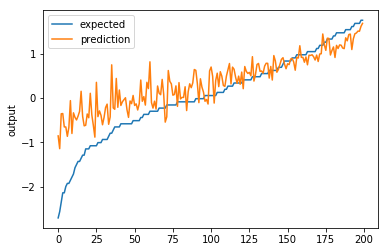

In [81]:
print("Z-Score Normalization:")
chart_regression(Y2_pred,Y2_test)

# Neural Network Modeling

In [19]:
from keras import Sequential
from keras.layers.core import Dense

Using TensorFlow backend.


In [20]:
model_relu = Sequential()
model_relu.add(Dense(60, input_dim=X_train.shape[1], activation='relu')) 
model_relu.add(Dense(30, activation='relu'))
model_relu.add(Dense(1))
model_relu.compile(loss='mean_squared_error', optimizer='adam')
model_relu.fit(X_train,Y_train,verbose=1,epochs=250) 

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/250
300/300 [==============================] - 1s 2ms/step - loss: 0.1951
Epoch 2/250
300/300 [==============================] - 0s 37us/step - loss: 0.0240
Epoch 3/250
300/300 [==============================] - 0s 50us/step - loss: 0.0274
Epoch 4/250
300/300 [==============================] - 0s 43us/step - loss: 0.0155
Epoch 5/250
300/300 [==============================] - 0s 37us/step - loss: 0.0120
Epoch 6/250
300/300 [==============================] - 0s 50us/step - loss: 0.0098
Epoch 7/250
300/300 [==============================] - 0s 40us/step - loss: 0.0084
Epoch 8/250
300/300 [==============================] - 0s 40us/step - loss: 0.0077
Epoch 9/250
300/300 [==============================] - 0s 37us/step - loss: 0.0067
Epoch 10/250
300/300 [==============================] - 0s 60us/step - loss: 0.0059
Epoch 11/250
300/300 [============================

300/300 [==============================] - 0s 40us/step - loss: 0.0032
Epoch 93/250
300/300 [==============================] - 0s 47us/step - loss: 0.0032
Epoch 94/250
300/300 [==============================] - 0s 37us/step - loss: 0.0031
Epoch 95/250
300/300 [==============================] - 0s 37us/step - loss: 0.0031
Epoch 96/250
300/300 [==============================] - 0s 40us/step - loss: 0.0033
Epoch 97/250
300/300 [==============================] - 0s 53us/step - loss: 0.0032
Epoch 98/250
300/300 [==============================] - 0s 43us/step - loss: 0.0032
Epoch 99/250
300/300 [==============================] - ETA: 0s - loss: 0.003 - 0s 40us/step - loss: 0.0032
Epoch 100/250
300/300 [==============================] - 0s 50us/step - loss: 0.0031
Epoch 101/250
300/300 [==============================] - 0s 60us/step - loss: 0.0031
Epoch 102/250
300/300 [==============================] - 0s 53us/step - loss: 0.0032
Epoch 103/250
300/300 [==============================] - 0s 47

300/300 [==============================] - 0s 43us/step - loss: 0.0029
Epoch 188/250
300/300 [==============================] - 0s 37us/step - loss: 0.0029
Epoch 189/250
300/300 [==============================] - 0s 40us/step - loss: 0.0030
Epoch 190/250
300/300 [==============================] - 0s 43us/step - loss: 0.0029
Epoch 191/250
300/300 [==============================] - 0s 40us/step - loss: 0.0028
Epoch 192/250
300/300 [==============================] - 0s 53us/step - loss: 0.0029
Epoch 193/250
300/300 [==============================] - 0s 40us/step - loss: 0.0028
Epoch 194/250
300/300 [==============================] - 0s 40us/step - loss: 0.0030
Epoch 195/250
300/300 [==============================] - 0s 47us/step - loss: 0.0029
Epoch 196/250
300/300 [==============================] - 0s 63us/step - loss: 0.0029
Epoch 197/250
300/300 [==============================] - 0s 66us/step - loss: 0.0028
Epoch 198/250
300/300 [==============================] - 0s 53us/step - loss: 0

In [21]:
Y_pred_nn = model_relu.predict(X_test)
print("Shape : {}".format(Y_pred_nn.shape))

Shape : (200, 1)


In [22]:
score_nn = np.sqrt(mean_squared_error(Y_test, Y_pred_nn))
print("Final score (RMSE): {}".format(score_nn))
print('R2 score: %.2f' % r2_score(Y_test, Y_pred_nn))

Final score (RMSE): 0.058527763932943344
R2 score: 0.81


Text(0, 0.5, 'Predicted values for Y')

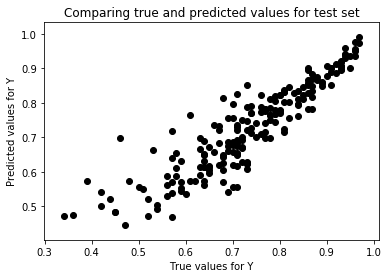

In [23]:
plt.scatter(Y_test, Y_pred_nn, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for Y')
plt.ylabel('Predicted values for Y')

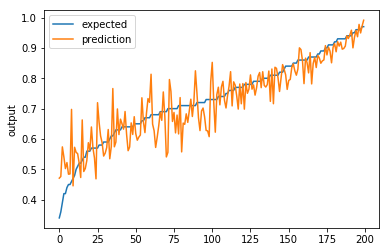

In [24]:
chart_regression(Y_pred_nn.flatten(), Y_test)

# Classification

In [25]:
import pandas as pd

data3 = pd.read_csv("Admission_Predict_Ver1.1_small_data_set_for_Linear_Regression.csv")
data3[0:5]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [26]:
data3 = data3.drop(['Serial No.'], axis=1)
data3[0:5]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# Discretization

In [27]:
bins = pd.cut(data3['Chance of Admit '], 3)
bins.value_counts(sort=False)

(0.339, 0.55]     63
(0.55, 0.76]     241
(0.76, 0.97]     196
Name: Chance of Admit , dtype: int64

In [28]:
bins = pd.qcut(data3['Chance of Admit '], 3)
bins.value_counts(sort=False)

(0.339, 0.663]    167
(0.663, 0.79]     178
(0.79, 0.97]      155
Name: Chance of Admit , dtype: int64

In [29]:
data3['Chance of Admit '] = np.where(data3['Chance of Admit '] <= 0.663 , 1, data3['Chance of Admit '])
data3['Chance of Admit '] = np.where(data3['Chance of Admit '] <= 0.79 , 2, data3['Chance of Admit '])
data3['Chance of Admit '] = np.where(data3['Chance of Admit '] <= 0.97 , 3, data3['Chance of Admit '])

In [30]:
data3

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,3.0
1,324,107,4,4.0,4.5,8.87,1,2.0
2,316,104,3,3.0,3.5,8.00,1,2.0
3,322,110,3,3.5,2.5,8.67,1,3.0
4,314,103,2,2.0,3.0,8.21,0,1.0
5,330,115,5,4.5,3.0,9.34,1,3.0
6,321,109,3,3.0,4.0,8.20,1,2.0
7,308,101,2,3.0,4.0,7.90,0,2.0
8,302,102,1,2.0,1.5,8.00,0,1.0
9,323,108,3,3.5,3.0,8.60,0,1.0


In [31]:
data3['Chance of Admit '].replace(1, 'Low', inplace=True)
data3['Chance of Admit '].replace(2, 'Medium', inplace=True)
data3['Chance of Admit '].replace(3, 'High', inplace=True)

In [32]:
data3

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,High
1,324,107,4,4.0,4.5,8.87,1,Medium
2,316,104,3,3.0,3.5,8.00,1,Medium
3,322,110,3,3.5,2.5,8.67,1,High
4,314,103,2,2.0,3.0,8.21,0,Low
5,330,115,5,4.5,3.0,9.34,1,High
6,321,109,3,3.0,4.0,8.20,1,Medium
7,308,101,2,3.0,4.0,7.90,0,Medium
8,302,102,1,2.0,1.5,8.00,0,Low
9,323,108,3,3.5,3.0,8.60,0,Low


In [33]:
from sklearn import tree

Y = pd.DataFrame(data3, columns=['Chance of Admit '])
X = data3.drop(['Chance of Admit '],axis=1)

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5)
clf = clf.fit(X, Y)

In [34]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
5,330,115,5,4.5,3.0,9.34,1
6,321,109,3,3.0,4.0,8.20,1
7,308,101,2,3.0,4.0,7.90,0
8,302,102,1,2.0,1.5,8.00,0
9,323,108,3,3.5,3.0,8.60,0


In [35]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data)  

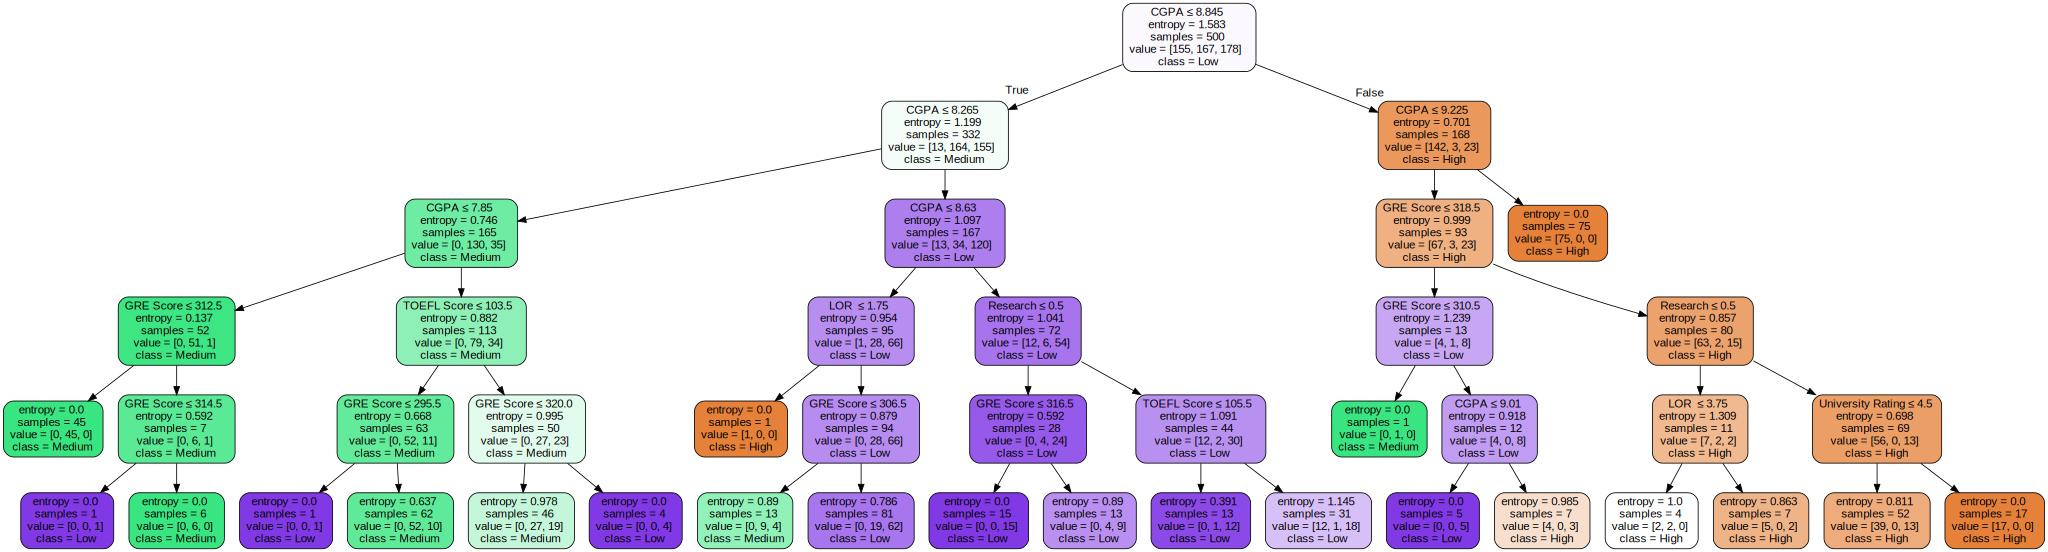

In [36]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=X.columns,  
                      class_names=['High','Medium','Low'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [42]:
testData = [[320,115,4,4.5,4,9.65,1,'High'],
           [324,107,4,4,4.5,8.87,1,'Medium'],
           [314,103,2,2,3,8.21,0,'Medium'],
           [314,105,3,3.5,2.5,8.3,0,'Low'],
           [298,98,2,1.5,2.5,7.5,1,'Low'],
           [320,110,5,5,5,9.2,1,'High']]
testData = pd.DataFrame(testData, columns=data.columns)
testData

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,320,115,4,4.5,4.0,9.65,1,High
1,324,107,4,4.0,4.5,8.87,1,Medium
2,314,103,2,2.0,3.0,8.21,0,Medium
3,314,105,3,3.5,2.5,8.30,0,Low
4,298,98,2,1.5,2.5,7.50,1,Low
5,320,110,5,5.0,5.0,9.20,1,High


In [43]:
testY = pd.DataFrame(testData, columns=['Chance of Admit '])
testX = testData.drop(['Chance of Admit '],axis=1)

predY = clf.predict(testX)
predictions = pd.concat([testData['Chance of Admit '],pd.Series(predY,name='Predicted Class')], axis=1)
predictions

,Chance of Admit,Predicted Class
0,High,High
1,Medium,High
2,Medium,Low
3,Low,Medium
4,Low,Low
5,High,High


In [44]:
from sklearn.metrics import accuracy_score

print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))

Accuracy on test data is 0.50
